# Veriye İlk Bakış

## Veri Seti Hikayesi ve Yapısının İncelenmesi

In [4]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## **İlk sorulacak soru: Veri setinin hikayesi nedir?**
## Bu veri seti nasıl oluşturulmuştur?
## Bu veri seti nasıl toplanmıştır?
## Veri setinin teorik olarak nasıl oluştuğunu sorgularız.

In [5]:
df = planets.copy()

In [7]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [8]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


**Veri Seti Yapısal Bilgileri**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [11]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [12]:
import pandas as pd

In [13]:
df.method = pd.Categorical(df.method)

In [14]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# Veri Setinin Betimlenmesi

In [16]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()

In [17]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
df.shape

(1035, 6)

In [19]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik Değerlerin İncelenmesi

In [23]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* Hiç eksik gözlem(değer) var mı?

In [24]:
df.isnull().values.any()

True

* Hangi değişkende kaçar tane var?

In [25]:
 df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [28]:
df["orbital_period"].fillna(0, inplace = True)
#NaN değer yerine 0 yazar

In [29]:
 df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000,2.00,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884,487.10,730000.0
mass,513.0,2.638161,3.818617,0.0036,0.229000,1.260,3.04,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250,178.50,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000,2012.00,2014.0


In [33]:
# df["mass"].fillna(df.mass.mean(), inplace = True) mass'in içindeki NaN değerler yerine mass'in ortalamaasını atar
# Her NaN değerin içine genel ortalamayı atar.
df.fillna(df.mean(), inplace = True)

/var/folders/bl/gp_zgv517j37tq1tqrg414vr0000gn/T/ipykernel_50720/2761525477.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [34]:
 df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [36]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Kategorik Değişken Özetleri

In [37]:
import seaborn as sns
import pandas as pn
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Sadece Kategorik Değişkenler ve Özetleri

In [38]:
kat_df = df.select_dtypes(include = ["object"])

In [39]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [45]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [47]:
kat_df["method"].value_counts().count()

10

## Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [48]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

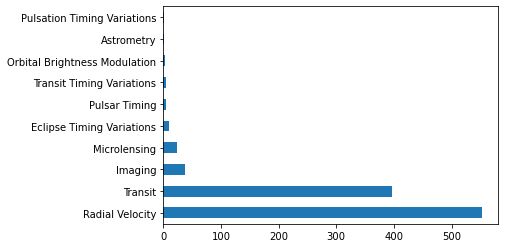

In [53]:
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özetleri

In [54]:
import seaborn as sns
import pandas as pn
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [55]:
df_num = df.select_dtypes(include = ["float64","int64"])

In [56]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [57]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [59]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

# Dağılım Grafikleri

## Barplot

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat(326-18,823)

carat: ağırlık(0.2-5.01)

cut:kalite(Fair,Good,Very Good,Premium, Ideal)

color:renk (from J(worst)to D (best))

clarity: temizliği, berraklığı(I1 (worst),SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best))

x:length in mm (0-10.74)

y:widdth in mm (0-58.9)

z:depth in mm (0-31.8)

depth: toplam derinlik yüzdesi = z/ mean(x,y) = (x+y)(43-79)

table: elmasın en geniş noktasına göre genişliği (43-95)

In [2]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bir Bakış**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [9]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [10]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [11]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [12]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"] 

In [13]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [14]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

 ## Bar Plot

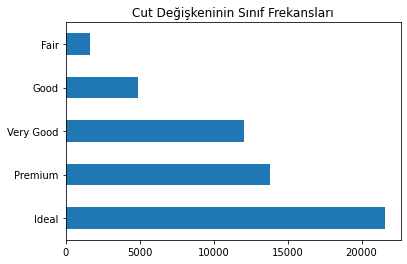

In [25]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

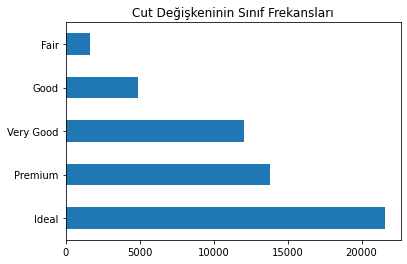

In [26]:
(df["cut"]
 .value_counts()
 .plot
 .barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

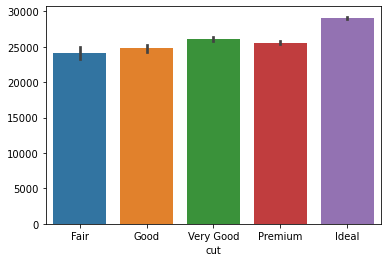

In [17]:
sns.barplot(x ="cut" , y = df.cut.index,data=df);

## Çaprazlamalar

In [18]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


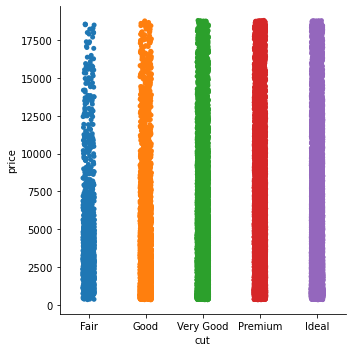

In [19]:
sns.catplot(x = "cut",y = "price",data = df);

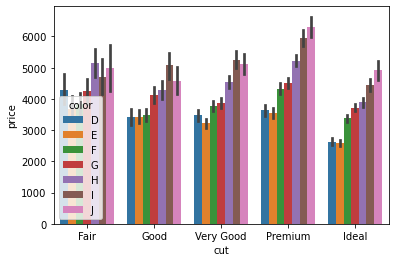

In [20]:
sns.barplot(x= "cut", y ="price",hue ="color",data =df);

In [21]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# Histogram ve Yoğunluk(Sayısal Değişkenler İçin)

In [6]:
import seaborn as sns 
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


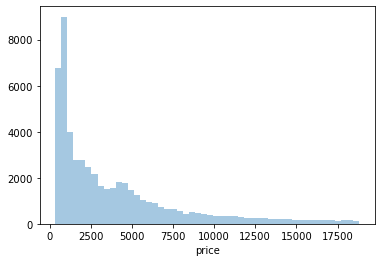

In [10]:
sns.distplot(df.price, kde = False);

* Histogram, bir veri kümesinin frekans dağılımını görmenizi sağlar. Histogramlar, geçmiş verilerin grafiğini çizmek için en sık kullanılan yöntemlerden biridir. Veriler tipik olarak, görüntüleyenlere bilgileri hızlı bir şekilde özümsemeleri için bir yol sağlayan bir çubuk grafikte görüntülenir.
* Frekans, devirli bir olayın saniyedeki devir sayısı.

In [30]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [7]:
sns.distplot?

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

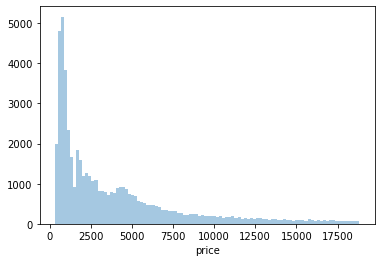

In [14]:
sns.distplot(df.price, bins = 100,kde = False);

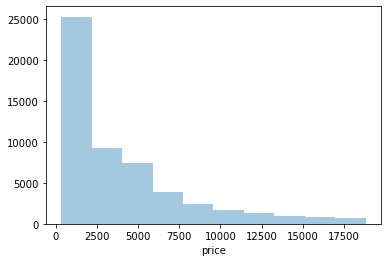

In [17]:
# bins kutu sayılarını değiştirmemizi sağlar bins = 10 10 tane kutuya sığdıralacağı anlamına gelir
sns.distplot(df.price, bins = 10,kde = False);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


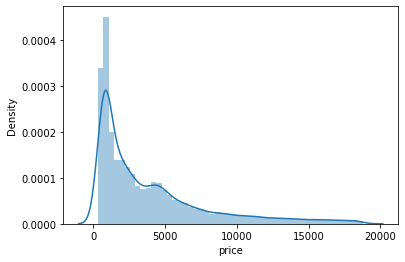

In [28]:
sns.distplot(df.price);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


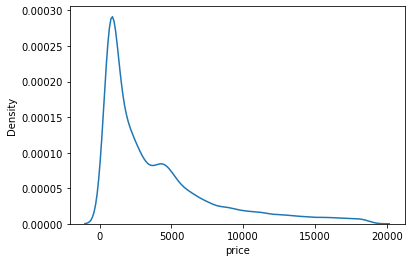

In [29]:
sns.distplot(df.price, hist = False);

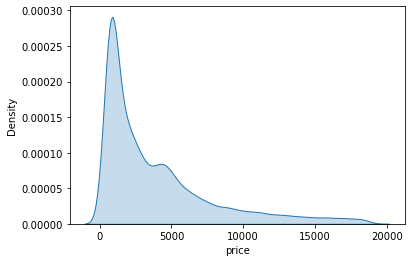

In [32]:
sns.kdeplot(df.price, shade = True);

## Çaprazlamalar

In [33]:
import seaborn as sns 
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


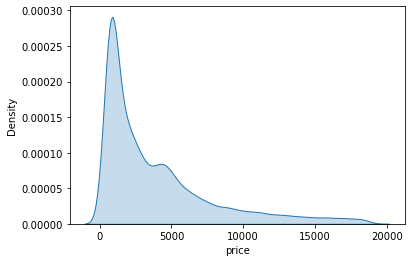

In [35]:
sns.kdeplot(df.price, shade = True);

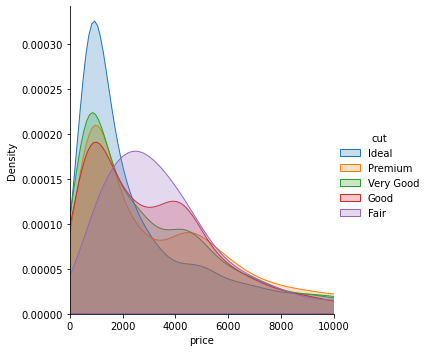

In [38]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price",shade = True)
 .add_legend()
);

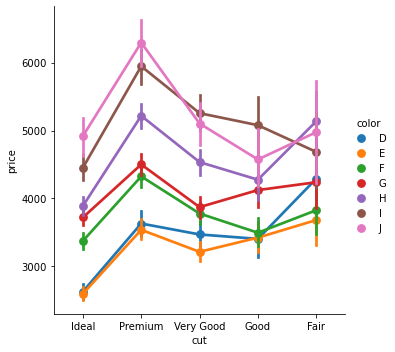

In [42]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

# Boxplot

## Veri Seti Hikayesi
* total_bill: yemeğin toplam fiyatı(bahşiş ve vergi dahil)
* tip: bahşiş
* sex: ücreti ödeye kişinin cinsiyeti(0=Male, 1=Female)
* smoker: grupta sigara içen var mı(0=No, 1=Yes)
* day: gün (3=Thur ,4=Fri ,5=Sat, 6=Sun)
* time: ne zaman? (0=Day, 1=Night)
* size: grupta kaç kişi var?

In [43]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Amaç: Elimize gelen veri setini tanımaya çalışıyoruz. Veri setini tanımak demek veri setini oluşturan değişkenleri tanımak demektir.**

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [46]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [47]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [48]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [49]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot

In [50]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


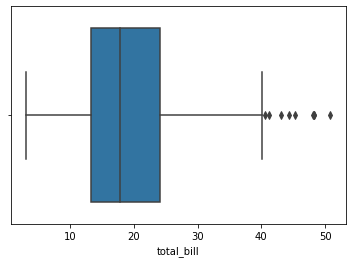

In [51]:
sns.boxplot(x = df["total_bill"]);

* Kutunun içinde soldan sağa %25, %50 ve %75lik değerleri gösterilir
* İlerde aykırı gözlem tanımlaması için faydalı olucak.

## Çaprazlamalar

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**SORU: Hangi günler daha fazla kazanıyoruz?**

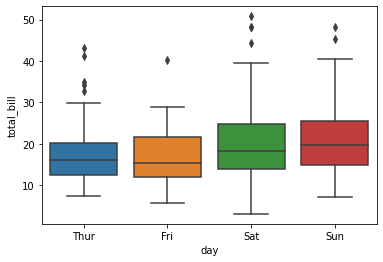

In [64]:
sns.boxplot(x = "day" , y = "total_bill", data = df );

**SORU: Sabah mı akşam mı daha çok kazanıyoruz?**

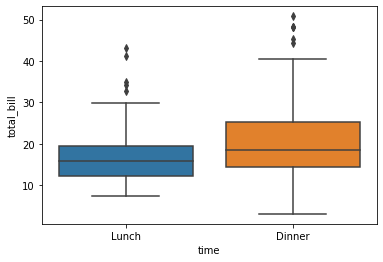

In [65]:
sns.boxplot(x = "time" , y = "total_bill", data = df );

**Kişi Sayısı Kazanç**

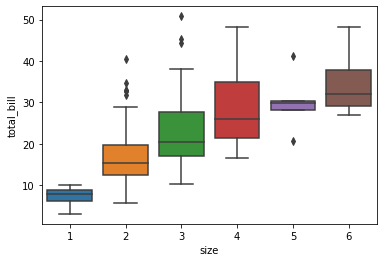

In [66]:
sns.boxplot(x = "size" , y = "total_bill", data = df );

**3 Argümanlı**

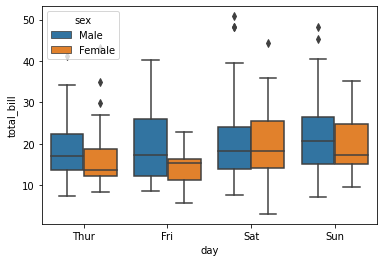

In [67]:
sns.boxplot(x = "day" , y = "total_bill", hue = "sex", data = df );

# Violin

In [68]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


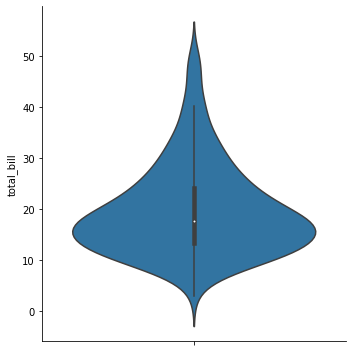

In [70]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

## Çaprazlamalar
* Kırılım ekleme = Boyut Ekleme = Çaprazlama Yapma

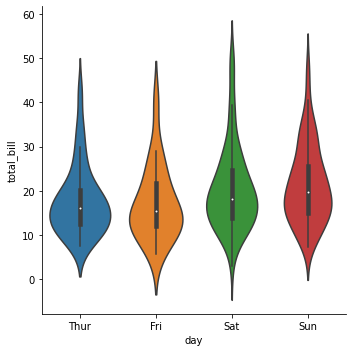

In [72]:
sns.catplot(x="day",y = "total_bill", kind = "violin", data = df);

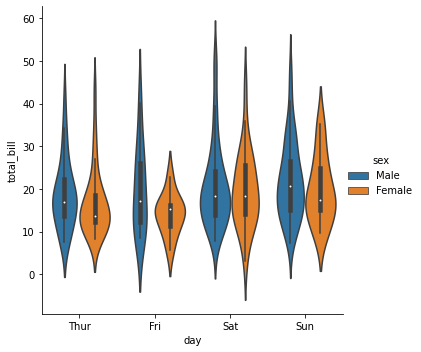

In [73]:
sns.catplot(x="day",y = "total_bill",hue = "sex", kind = "violin", data = df);

# Korelasyon Grafikleri

* Değişkenler arası ilişkiyi ifade eden istatistiksel bir terimdir.

## Scatterplot(Saçılım Grafiği)
* **Sayısal Değişkenler Arasındaki İlşkiyi Gösterir**
* **2 Değişkenli Veri Görselleştirme**

* total_bill: yemeğin toplam fiyatı(bahşiş ve vergi dahil)
* tip: bahşiş
* sex: ücreti ödeye kişinin cinsiyeti(0=Male, 1=Female)
* smoker: grupta sigara içen var mı(0=No, 1=Yes)
* day: gün (3=Thur ,4=Fri ,5=Sat, 6=Sun)
* time: ne zaman? (0=Day, 1=Night)
* size: grupta kaç kişi var?

In [1]:
import seaborn as sns 
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


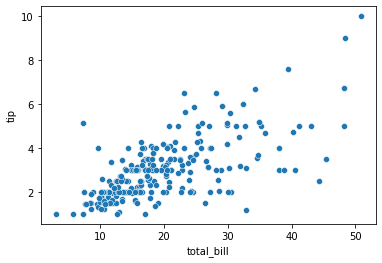

In [3]:
sns.scatterplot(x = "total_bill",y = "tip",data = df);

## Çaprazlamalar

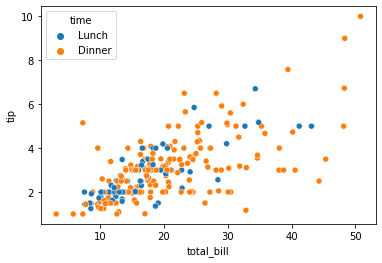

In [5]:
sns.scatterplot(x = "total_bill",y = "tip",hue = "time",data = df);

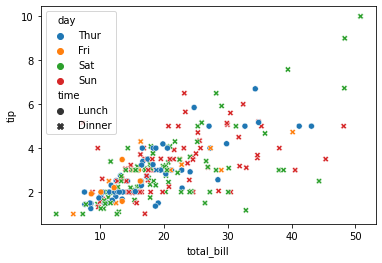

In [10]:
sns.scatterplot(x = "total_bill",y = "tip",hue = "day",style = "time",data = df);

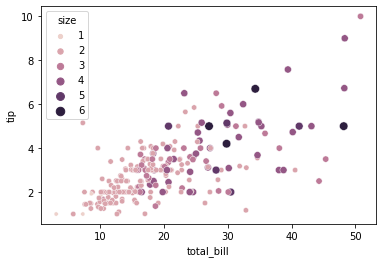

In [14]:
sns.scatterplot(x = "total_bill",y = "tip",hue = "size",size = "size",data = df);

## Doğrusal İlişkinin Gösterilmesi

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

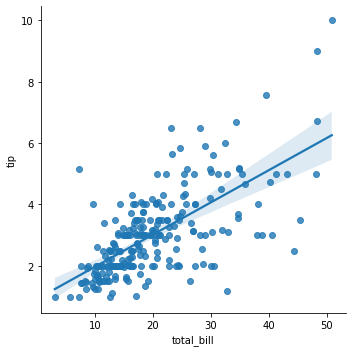

In [16]:
# lm = lineer model
sns.lmplot(x = "total_bill", y = "tip", data =df);

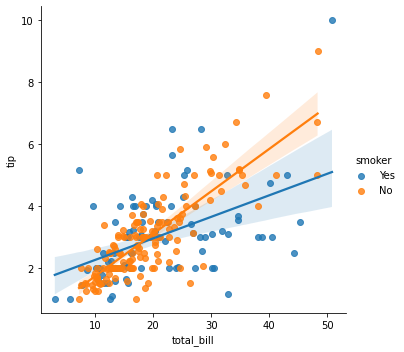

In [17]:
sns.lmplot(x = "total_bill", y = "tip",hue = "smoker", data =df);

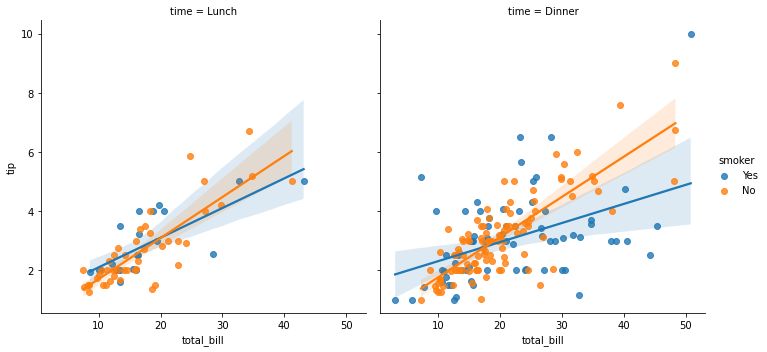

In [18]:
sns.lmplot(x = "total_bill", y = "tip",hue = "smoker",col = "time" ,data =df);

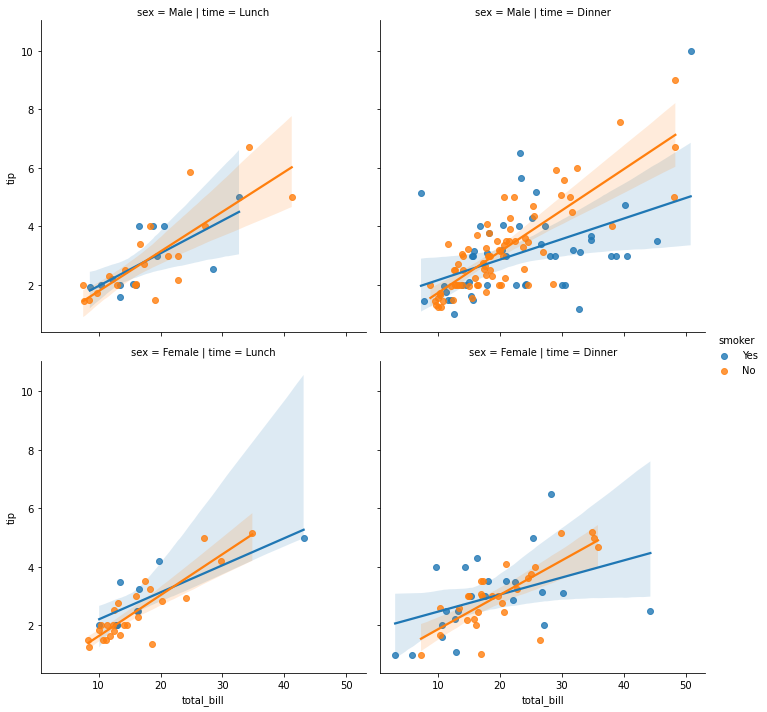

In [21]:
(sns.lmplot(x = "total_bill",
            y = "tip",
            hue = "smoker",
            col = "time" ,
            row = "sex",
            data =df));

## Scatterplot Matrisi

In [23]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [27]:
df.shape

(150, 5)

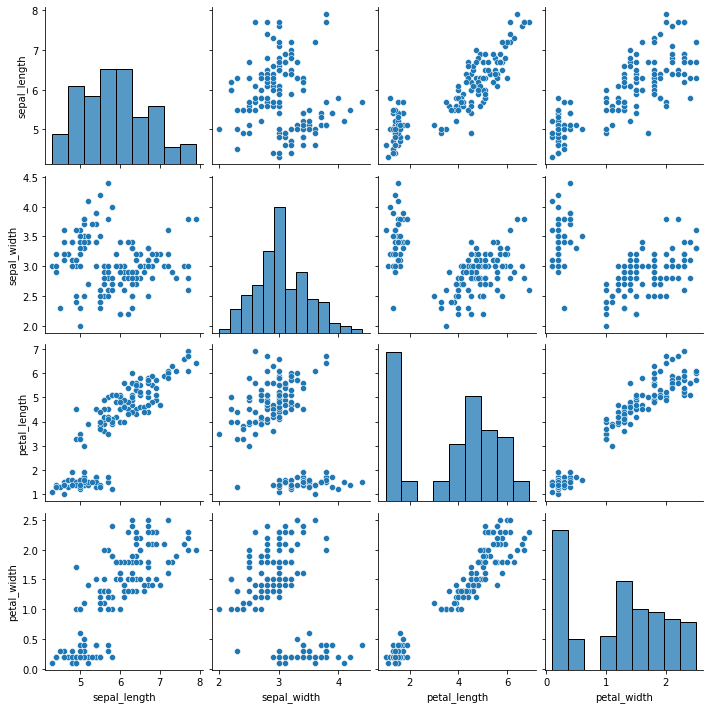

In [29]:
sns.pairplot(df);

* Sepal = Çanakyaprak
* Petal = Taçyaprağı(Çiçek yaprağı)

* Toz bulutu şeklindeyse veya yapısal bir formu yoksa o iki değişken arasında bir ilişki olmadığı anlamına gelir.
* Oluşturulan bir scaterplot içerisinde gözlem grupları incelendiğinde bunlar eğer birbirinden farklı yerlerde kümeleniyorsa bu durumda sık sık vurgulanan çaprazlama durumudan kaynaklanan bu kümelenmeleri oluşturan bazı alt gruplar vardır.

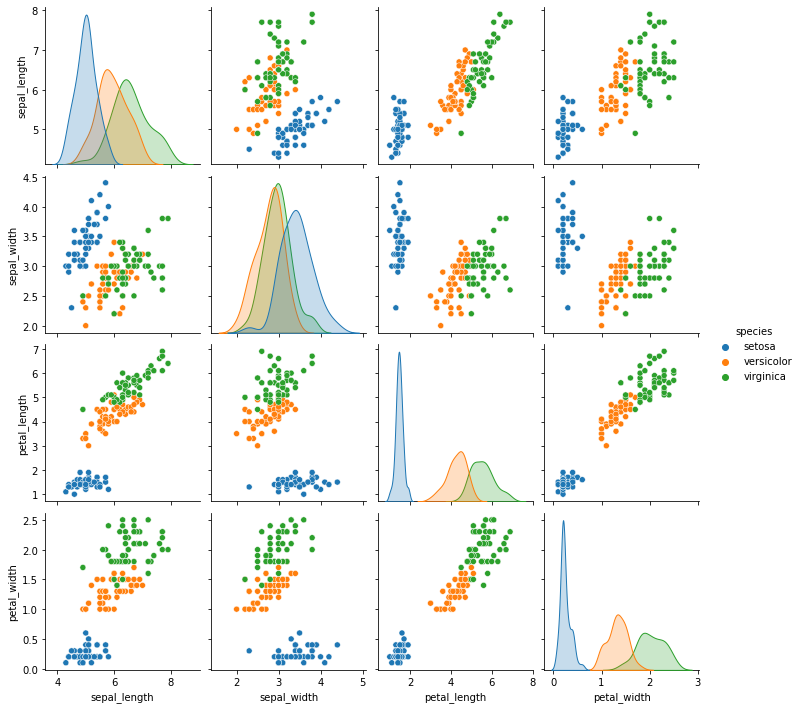

In [30]:
sns.pairplot(df, hue = "species");

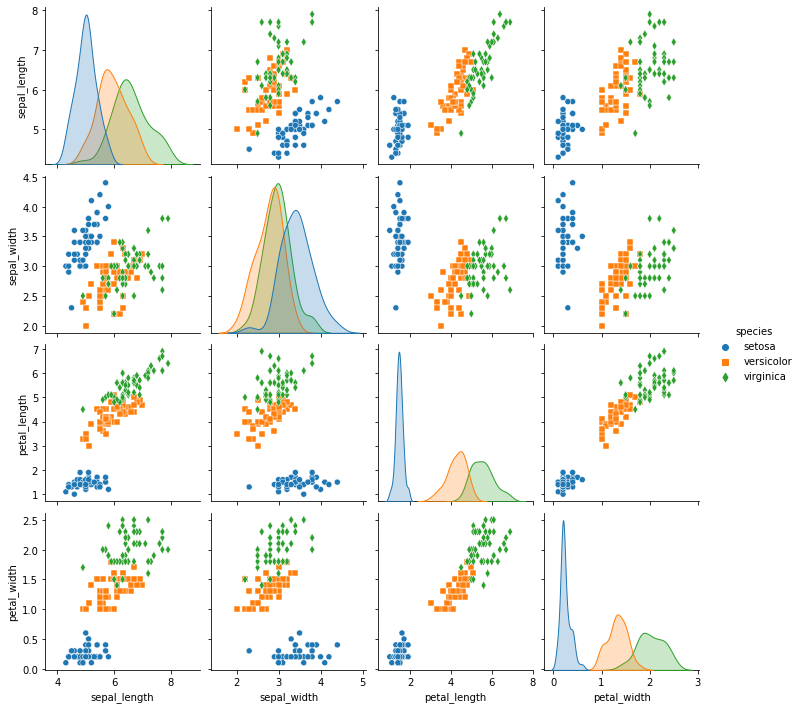

In [31]:
sns.pairplot(df, hue = "species",markers = ["o","s","d"]);

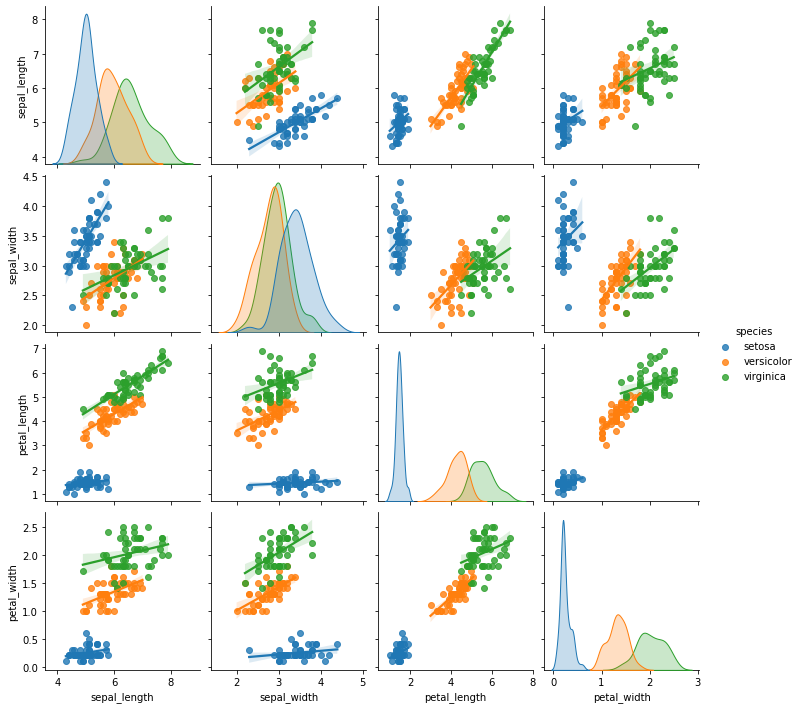

In [34]:
sns.pairplot(df, kind = "reg", hue = "species");

# Heatmap

## Veri Seti Hikayesi

In [38]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [39]:
df.shape

(144, 3)

In [41]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [43]:
# sns.heatmap(df);
# Pivot tablo şekline sokmak lazım aksi takdirde hata alırız.

In [44]:
df = df.pivot("month","year","passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


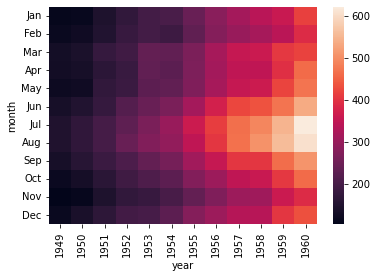

In [46]:
sns.heatmap(df);

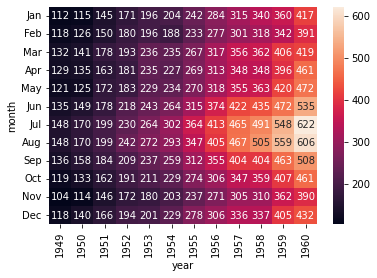

In [47]:
sns.heatmap(df, annot = True, fmt = "d");

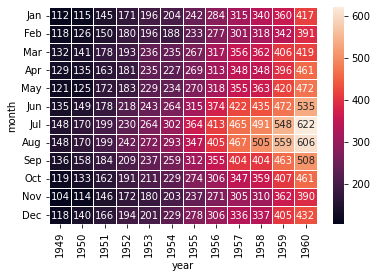

In [48]:
sns.heatmap(df, annot = True, fmt = "d",linewidths = 0.5);

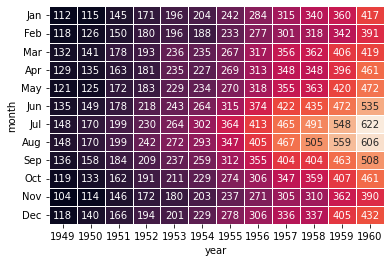

In [49]:
sns.heatmap(df, annot = True, fmt = "d",linewidths = 0.5, cbar = False);

# Çizgi Grafik

## Veri Seti Hikayesi

In [51]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


* Daha zor problemlerde kullanılır.
* Zamana bağlı değişkenlerin olduğu veri setlerinde ve _nesnelerin interneti_ gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanılabilen bir veri görselleştirme tekniğidir.

In [52]:
df.shape

(1064, 5)

In [54]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [55]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [56]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [58]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [60]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlamalar

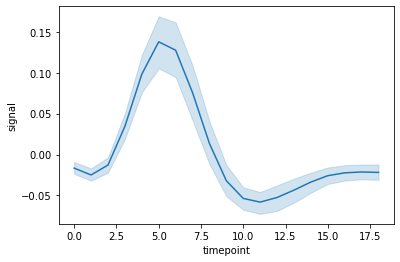

In [62]:
sns.lineplot(x= "timepoint", y = "signal",data = df);

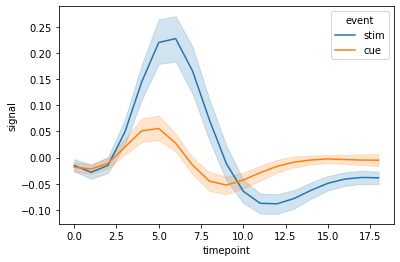

In [63]:
sns.lineplot(x= "timepoint", y = "signal",hue = "event",data = df);

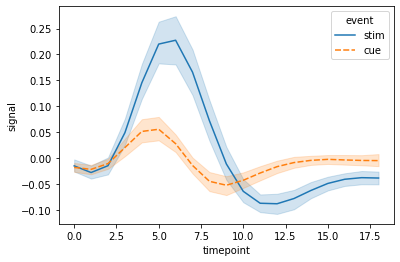

In [64]:
sns.lineplot(x= "timepoint", y = "signal",hue = "event", style = "event",data = df);

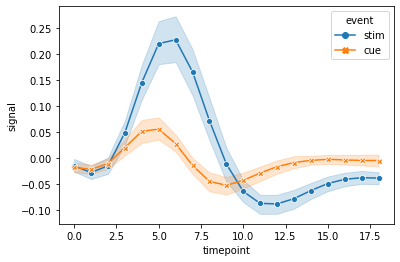

In [70]:
(sns.lineplot(x= "timepoint",
             y = "signal",
             hue = "event",
             style = "event",
             markers = True,
             dashes = False,
             data = df));

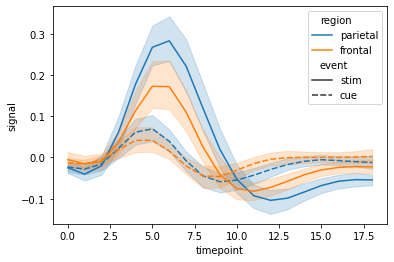

In [71]:
(sns.lineplot(x= "timepoint",
             y = "signal",
             hue = "region",
             style = "event",
             data = df));

# Basit Zaman Serisi Grafiği

In [1]:
!pip install pandas_datareader
import pandas_datareader as pr

In [2]:
import pandas as pd

In [3]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25")

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/AAPL/history?period1=1451613600&period2=1566781199&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd2b9021370>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [94]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251436
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643713
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181009
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202663
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320068


In [95]:
df.shape

(917, 6)

In [105]:
kapanis = df["Close"]

In [106]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

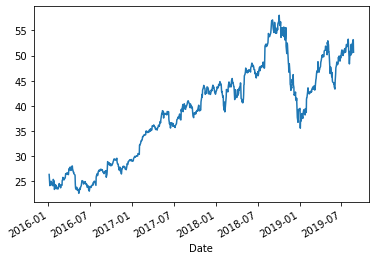

In [107]:
kapanis.plot();

In [108]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [110]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [111]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

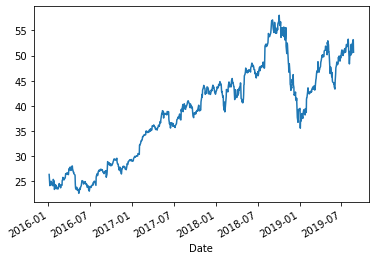

In [112]:
kapanis.plot();